In [39]:
import pandas as pd
import re 

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import  train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from  sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

from nltk.tokenize import word_tokenize
from nltk.stem.lancaster import LancasterStemmer
from nltk.corpus import stopwords

import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
# Lendo o dataset e separando os dados e as classes

bbc_df = pd.read_csv("../data/bbc_data.csv")
#bbc_df["labels"] = bbc_df["labels"].map({"entertainment": 0, "tech": 1, "business": 2, "politics": 3, "sport": 4})

X_train, X_test, y_train, y_test = train_test_split(bbc_df["data"], bbc_df["labels"], test_size=0.30, random_state=42)



In [14]:
# Preprocessamento

bbc_df_copy = bbc_df.copy()
stops_words = stopwords.words("english")

stemmer = LancasterStemmer()

def preprocess(text):
    text = text.lower()
    text = re.sub(r"[^a-zA-Z]", " ", text)
    tokens = word_tokenize(text)
    stemmed_tokens = [stemmer.stem(word) for word in tokens if word not in stops_words]
    return " ".join(stemmed_tokens)

X_train = X_train.apply(preprocess)
X_test = X_test.apply(preprocess)

In [15]:
# Funções de vectorização

def vectorize(model):
    results = model.fit_transform(X_train)
    test = model.transform(X_test)
    df_model = pd.DataFrame(results.toarray(), columns=model.get_feature_names_out())
    df_test = pd.DataFrame(test.toarray(), columns=model.get_feature_names_out())
    return df_model, df_test

# Vectors Bag of words
cv = CountVectorizer()
cv_df, cv_df_test = vectorize(cv)

# Vectors TF-IDF
tfidf = TfidfVectorizer()
tfidf_df, tfidf_df_test = vectorize(tfidf)



In [36]:
# Metrics analysis

def metrics_describe(model, df_test):
    y_pred = model.predict(df_test)
    
    #metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average="weighted")
    recall = recall_score(y_test, y_pred, average="weighted")
    f1 = f1_score(y_test, y_pred, average="weighted")
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    #plot
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6), gridspec_kw={'width_ratios': [3, 1]})

    # Plotar a matriz de confusão no primeiro subplot
    sns.heatmap(conf_matrix, annot=True, cmap="YlGnBu", fmt="d", cbar=False, ax=ax1)
    ax1.set_title('Matriz de Confusão')
    ax1.set_xlabel('Classe Prevista')
    ax1.set_ylabel('Classe Verdadeira')

    # Escrever as métricas no segundo subplot
    ax2.axis('off')  # Esconde os eixos
    metrics_text = f"""Métricas:
    Accuracy:  {accuracy:.2f}
    Precision: {precision:.2f}
    Recall:    {recall:.2f}
    F1 Score:  {f1:.2f}"""

    ax2.text(0.5, 0.5, metrics_text, fontsize=14, ha='center', va='center', bbox=dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor="white"))
    plt.show()

## O seguintes resultados são referentes a vetorização com Bang of Words

In [42]:
# modelos utilizados
clf = LogisticRegression()
svm = LinearSVC()
nb = MultinomialNB()

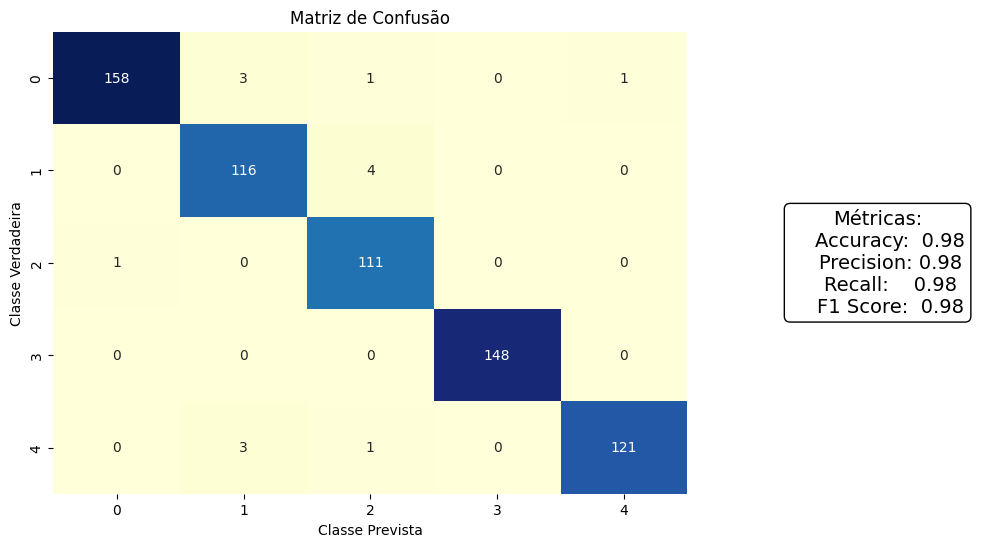

In [37]:
# Logistic Regression

clf.fit(cv_df, y_train)
metrics_describe(clf, cv_df_test)

/home/shinigami/.cache/pypoetry/virtualenvs/pln-LPbjoYHC-py3.12/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


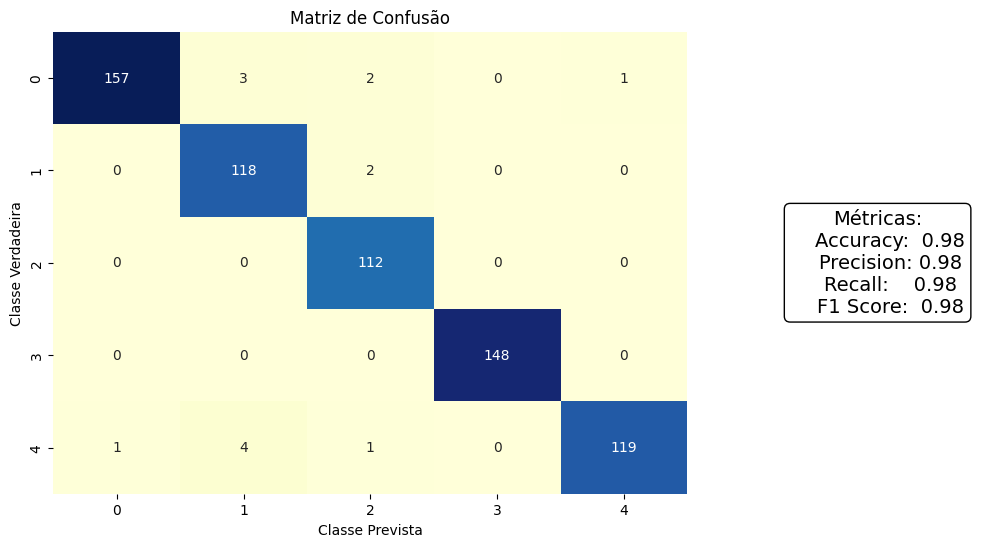

In [40]:
svm.fit(cv_df, y_train)
metrics_describe(svm, cv_df_test)

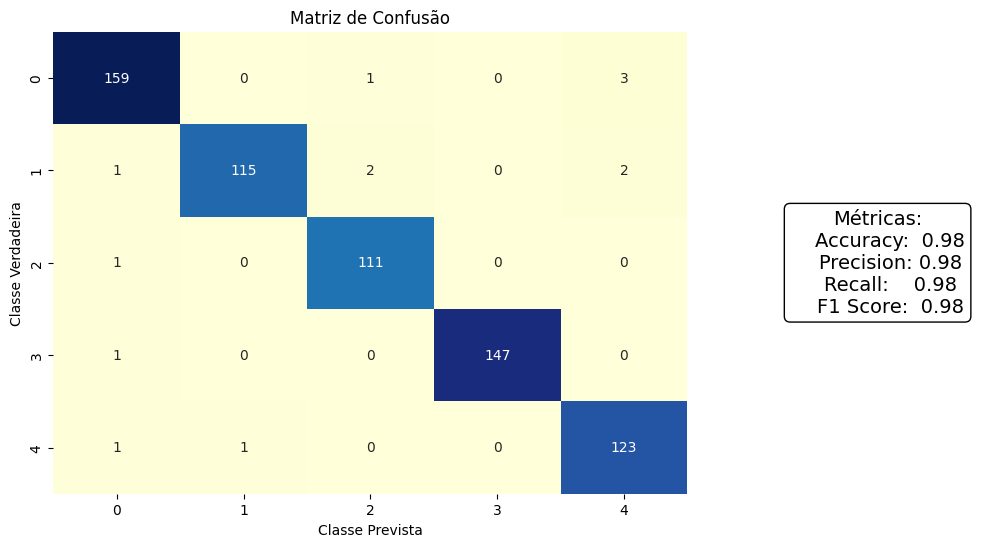

In [41]:
nb.fit(cv_df, y_train)
metrics_describe(nb, cv_df_test)

## O seguintes resultados são referentes a vetorização com TF-IDF

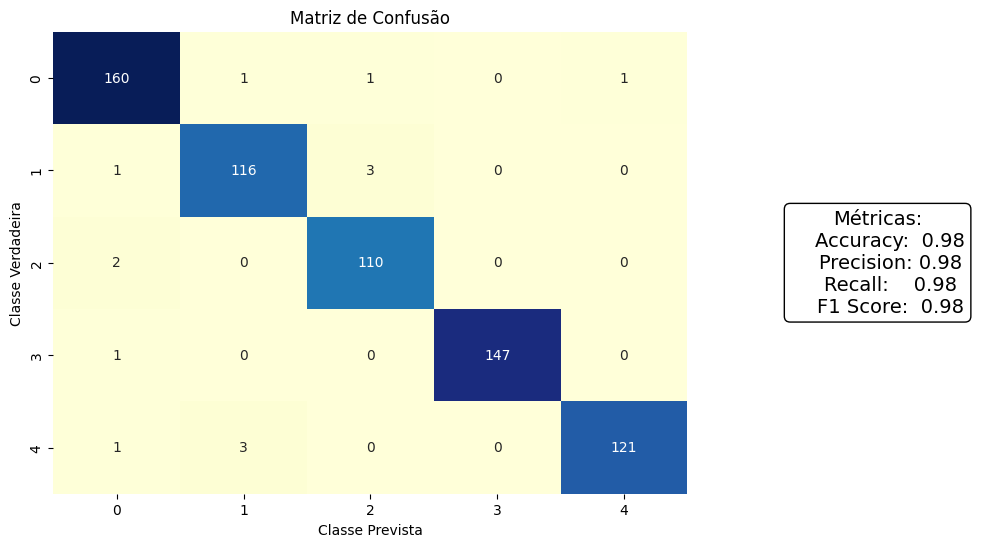

In [43]:
clf.fit(tfidf_df, y_train)
metrics_describe(clf, tfidf_df_test)

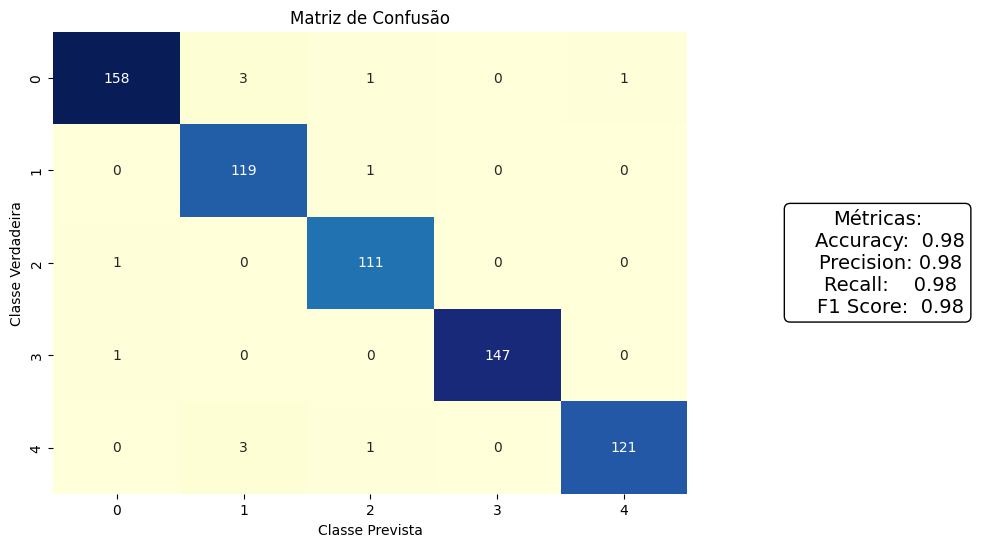

In [44]:
svm.fit(tfidf_df, y_train)
metrics_describe(svm, tfidf_df_test)

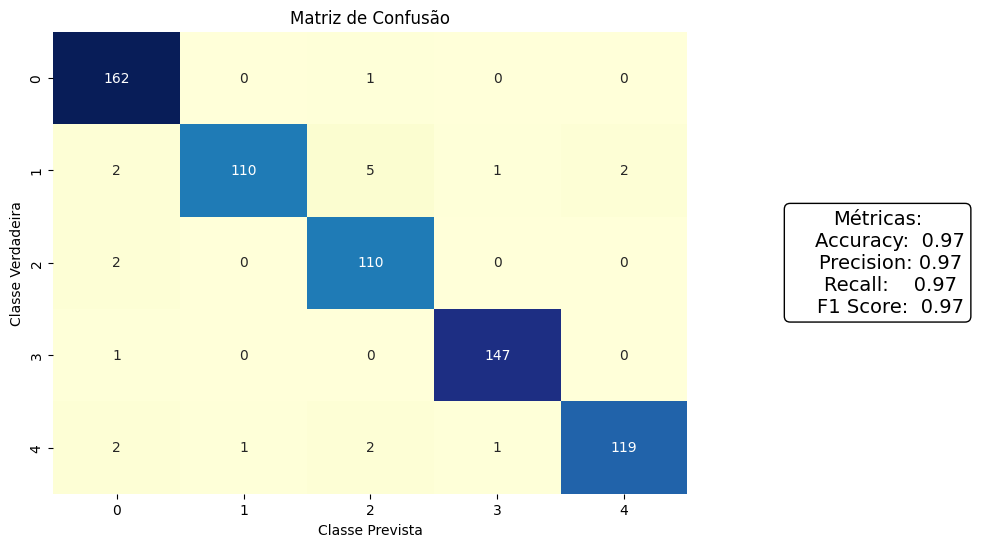

In [46]:
nb.fit(tfidf_df, y_train)
metrics_describe(nb, tfidf_df_test)

### Tem nem o que compara !